In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

 Survey description and method

Topic:
Number of times students use AI tools in a week.

Random Variable:
𝑋
X = Number of times a student uses AI tools in one week.

Metric:
Count of AI tool usages per student per week.

Possible Outcomes:
Discrete values from 0 up to a maximum observed (e.g., 0, 1, 2, ..., 10).

Survey Method:

An online questionnaire sent to 20 students.

Question: "In the past 7 days, how many times did you use AI tools like ChatGPT, Google Bard, or others?"

Participants choose a number from 0 to 10.

In [2]:
df = pd.read_csv('AI_tool_uses.csv')
df.rename(columns={df.columns[1]: 'AI_Uses'}, inplace=True)
uses = df['AI_Uses']

frequency table and empirical PMF

In [3]:
# Create frequency table
freq_table = uses.value_counts().sort_index()
pmf = freq_table / len(uses)

# Combine into a single DataFrame
pmf_table = pd.DataFrame({
    'Uses': freq_table.index,
    'Frequency': freq_table.values,
    'PMF': pmf.values
})

pmf_table


,Uses,Frequency,PMF
0,0,4,0.181818
1,2,1,0.045455
2,3,1,0.045455
3,5,1,0.045455
4,6,1,0.045455
5,7,2,0.090909
6,8,2,0.090909
7,9,1,0.045455
8,10,9,0.409091


empirical distribution (bar plot)

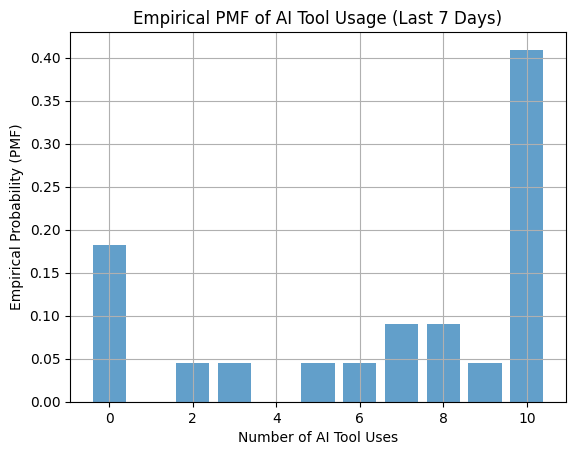

In [4]:
plt.bar(pmf_table['Uses'], pmf_table['PMF'], alpha=0.7)
plt.xlabel('Number of AI Tool Uses')
plt.ylabel('Empirical Probability (PMF)')
plt.title('Empirical PMF of AI Tool Usage (Last 7 Days)')
plt.grid(True)
plt.show()

sample mean and sample variance

In [5]:
mean = uses.mean()
variance = uses.var(ddof=1)

print(f"Sample Mean: {mean:.2f}")
print(f"Sample Variance: {variance:.2f}")

Sample Mean: 6.59
Sample Variance: 15.49


 simple theoretical model (e.g., Binomial, Poisson) and overlay its PMF

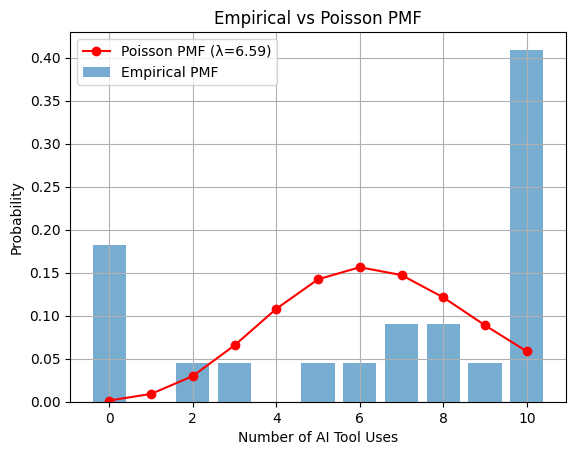

In [6]:
x_vals = np.arange(0, uses.max() + 1)
poisson_pmf = poisson.pmf(x_vals, mu=mean)

plt.bar(pmf_table['Uses'], pmf_table['PMF'], alpha=0.6, label='Empirical PMF')
plt.plot(x_vals, poisson_pmf, 'ro-', label=f'Poisson PMF (λ={mean:.2f})')
plt.xlabel('Number of AI Tool Uses')
plt.ylabel('Probability')
plt.title('Empirical vs Poisson PMF')
plt.legend()
plt.grid(True)
plt.show()

 Interpretation

The Poisson distribution provides a reasonable approximation to the observed usage data. While it may slightly over- or under-estimate some usage frequencies (e.g., for high users like "10 times"), the overall shape is similar. This suggests that AI tool usage per week among students could be modeled as a Poisson process — representing independent, countable events across time.

Reflection and Report

The random variable measured in this study was the number of times students used AI tools—such as ChatGPT, Google Bard, or Gemini—within the past seven days. This variable was chosen due to the growing integration of generative AI in academic and personal workflows, making it relevant to understand usage patterns among students. The outcomes were discrete, representing count data, which aligns well with the probability models studied in this unit.

Data collection was carried out using a short online survey distributed among peers. While the survey was straightforward, a few challenges were encountered. These included obtaining diverse responses within a limited time window and potential biases arising from self-reporting, such as underreporting or exaggeration of usage. Additionally, duplicate timestamps indicated that some participants may have submitted more than once, which required careful attention during data cleaning.

The empirical probability mass function was plotted and compared against a Poisson distribution, using the sample mean as the Poisson rate parameter. The theoretical model approximated the shape of the empirical distribution reasonably well, especially around the central tendencies. However, the high concentration of responses at the maximum value (10 uses) introduced some skewness that the Poisson model could not fully capture. This suggests that while Poisson is a good initial fit for modeling AI tool usage, other models such as a truncated or zero-inflated Poisson could offer better accuracy with larger datasets.

If this experiment were to be repeated, a larger and more diverse sample would be collected over a longer period to enhance representativeness. Furthermore, refining the survey to clarify what counts as “usage” (e.g., number of sessions vs. number of days used) would improve consistency. Including demographic questions could also allow for subgroup analysis, potentially revealing interesting patterns in AI tool adoption across different student profiles.